This notebook writes out all of the good TGAS positions into one big file.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import FunctionsToLoadGaia as load

import astropy.io.ascii, astropy.table

In [2]:

from glob import glob
filenames = glob('data/TgasSource_000-000-*.fits')
print filenames
X, Y, Z, AbsoluteMagnitudes = np.array([]), np.array([]), np.array([]), np.array([])
for f in range(len(filenames)):
    XX,YY,ZZ,RA,Dec,Magnitudes,Distances,AB,Fluxes,label =load.extractStars(filenames[f])
    X = np.append(X, XX)
    Y = np.append(Y, YY)
    Z = np.append(Z, ZZ)
    AbsoluteMagnitudes = np.append(AbsoluteMagnitudes, AB)


['data/TgasSource_000-000-000.fits', 'data/TgasSource_000-000-001.fits', 'data/TgasSource_000-000-002.fits', 'data/TgasSource_000-000-003.fits', 'data/TgasSource_000-000-004.fits', 'data/TgasSource_000-000-005.fits', 'data/TgasSource_000-000-006.fits', 'data/TgasSource_000-000-007.fits', 'data/TgasSource_000-000-008.fits', 'data/TgasSource_000-000-009.fits', 'data/TgasSource_000-000-010.fits', 'data/TgasSource_000-000-011.fits', 'data/TgasSource_000-000-012.fits', 'data/TgasSource_000-000-013.fits', 'data/TgasSource_000-000-014.fits', 'data/TgasSource_000-000-015.fits']


In [4]:
print len(X)

2057050


<IPython.core.display.Javascript object>


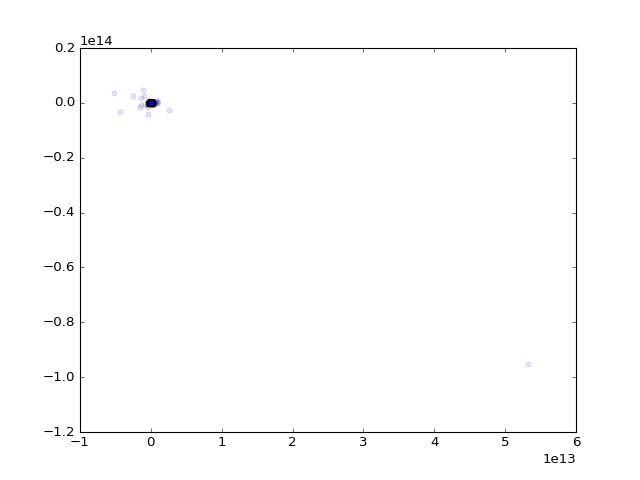

In [5]:
plt.scatter(X,Y,alpha=0.1)

In [3]:
ID = np.arange(len(X))
DX = np.zeros_like(X)
DY = np.zeros_like(X)
DZ = np.zeros_like(X)
BV = np.zeros_like(X)

au_per_pc = 180/np.pi*60*60
X /= au_per_pc
Y /= au_per_pc
Z /= au_per_pc

table = astropy.table.Table([ID, X, Y, Z, DX, DY, DZ, BV, AbsoluteMagnitudes],
        names=['ID', 'X', 'Y', 'Z', 'DX', 'DY', 'DZ', 'BV', 'AbsMag'])
                      



# write out the table
astropy.io.ascii.write(table, 'allNEW2.dat',
                       format='fixed_width',
                       delimiter='\t')#,overwrite=True)

#This was added to a function named fileForFiske. It is found on FunctionsToLoadGaia.

In [6]:
# this trims the astropy header off the file
!tail +2 allNEW2.dat > withoutheader.dat

In [5]:
# combine the prefix and the header together
!cat prefix.dat withoutheader.dat > allNEW2.dat

cat: prefix.dat: No such file or directory


In [ ]:
au_per_pc = 180/np.pi*60*60
X /= au_per_pc
Y /= au_per_pc
Z /= au_per_pc
table = astropy.table.Table([ID, X, Y, Z, DX, DY, DZ, BV, AbsoluteMagnitudes],
        names=['ID', 'X', 'Y', 'Z', 'DX', 'DY', 'DZ', 'BV', 'AbsMag'])
astropy.io.ascii.write(table, 'alltogether2.dat',
                       format='fixed_width',
                       delimiter='\t')#,overwrite=True)                     

In [ ]:
# this trims the astropy header off the file
!tail +2 alltogether2.dat > withoutheader2.dat

In [ ]:
# combine the prefix and the header together
!cat prefix.dat withoutheader2.dat > TGAS2.dat